In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
#importing database
data = pd.read_csv('bankfull.csv',sep=';')

In [4]:
data.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [6]:
data.describe(include=int)

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [7]:
data.describe(include=object)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
count,45211,45211,45211,45211,45211,45211,45211,45211,45211,45211
unique,12,3,4,2,2,2,3,12,4,2
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown,no
freq,9732,27214,23202,44396,25130,37967,29285,13766,36959,39922


#### EDA 

In [8]:
#To check the null values.
data.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

 There is no null value in our data

In [9]:
# To check the duplicated values
data[data.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


No duplicated values in our dataset

In [11]:
data1=data.select_dtypes(object)
data1.head(25)

,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no
5,management,married,tertiary,no,yes,no,unknown,may,unknown,no
6,management,single,tertiary,no,yes,yes,unknown,may,unknown,no
7,entrepreneur,divorced,tertiary,yes,yes,no,unknown,may,unknown,no
8,retired,married,primary,no,yes,no,unknown,may,unknown,no
9,technician,single,secondary,no,yes,no,unknown,may,unknown,no


#### Visualization

In [12]:
plt.rcParams['figure.figsize'] = (20,15)
plt.rcParams['figure.dpi'] = 350
sns.set_style('darkgrid')

<Axes: >

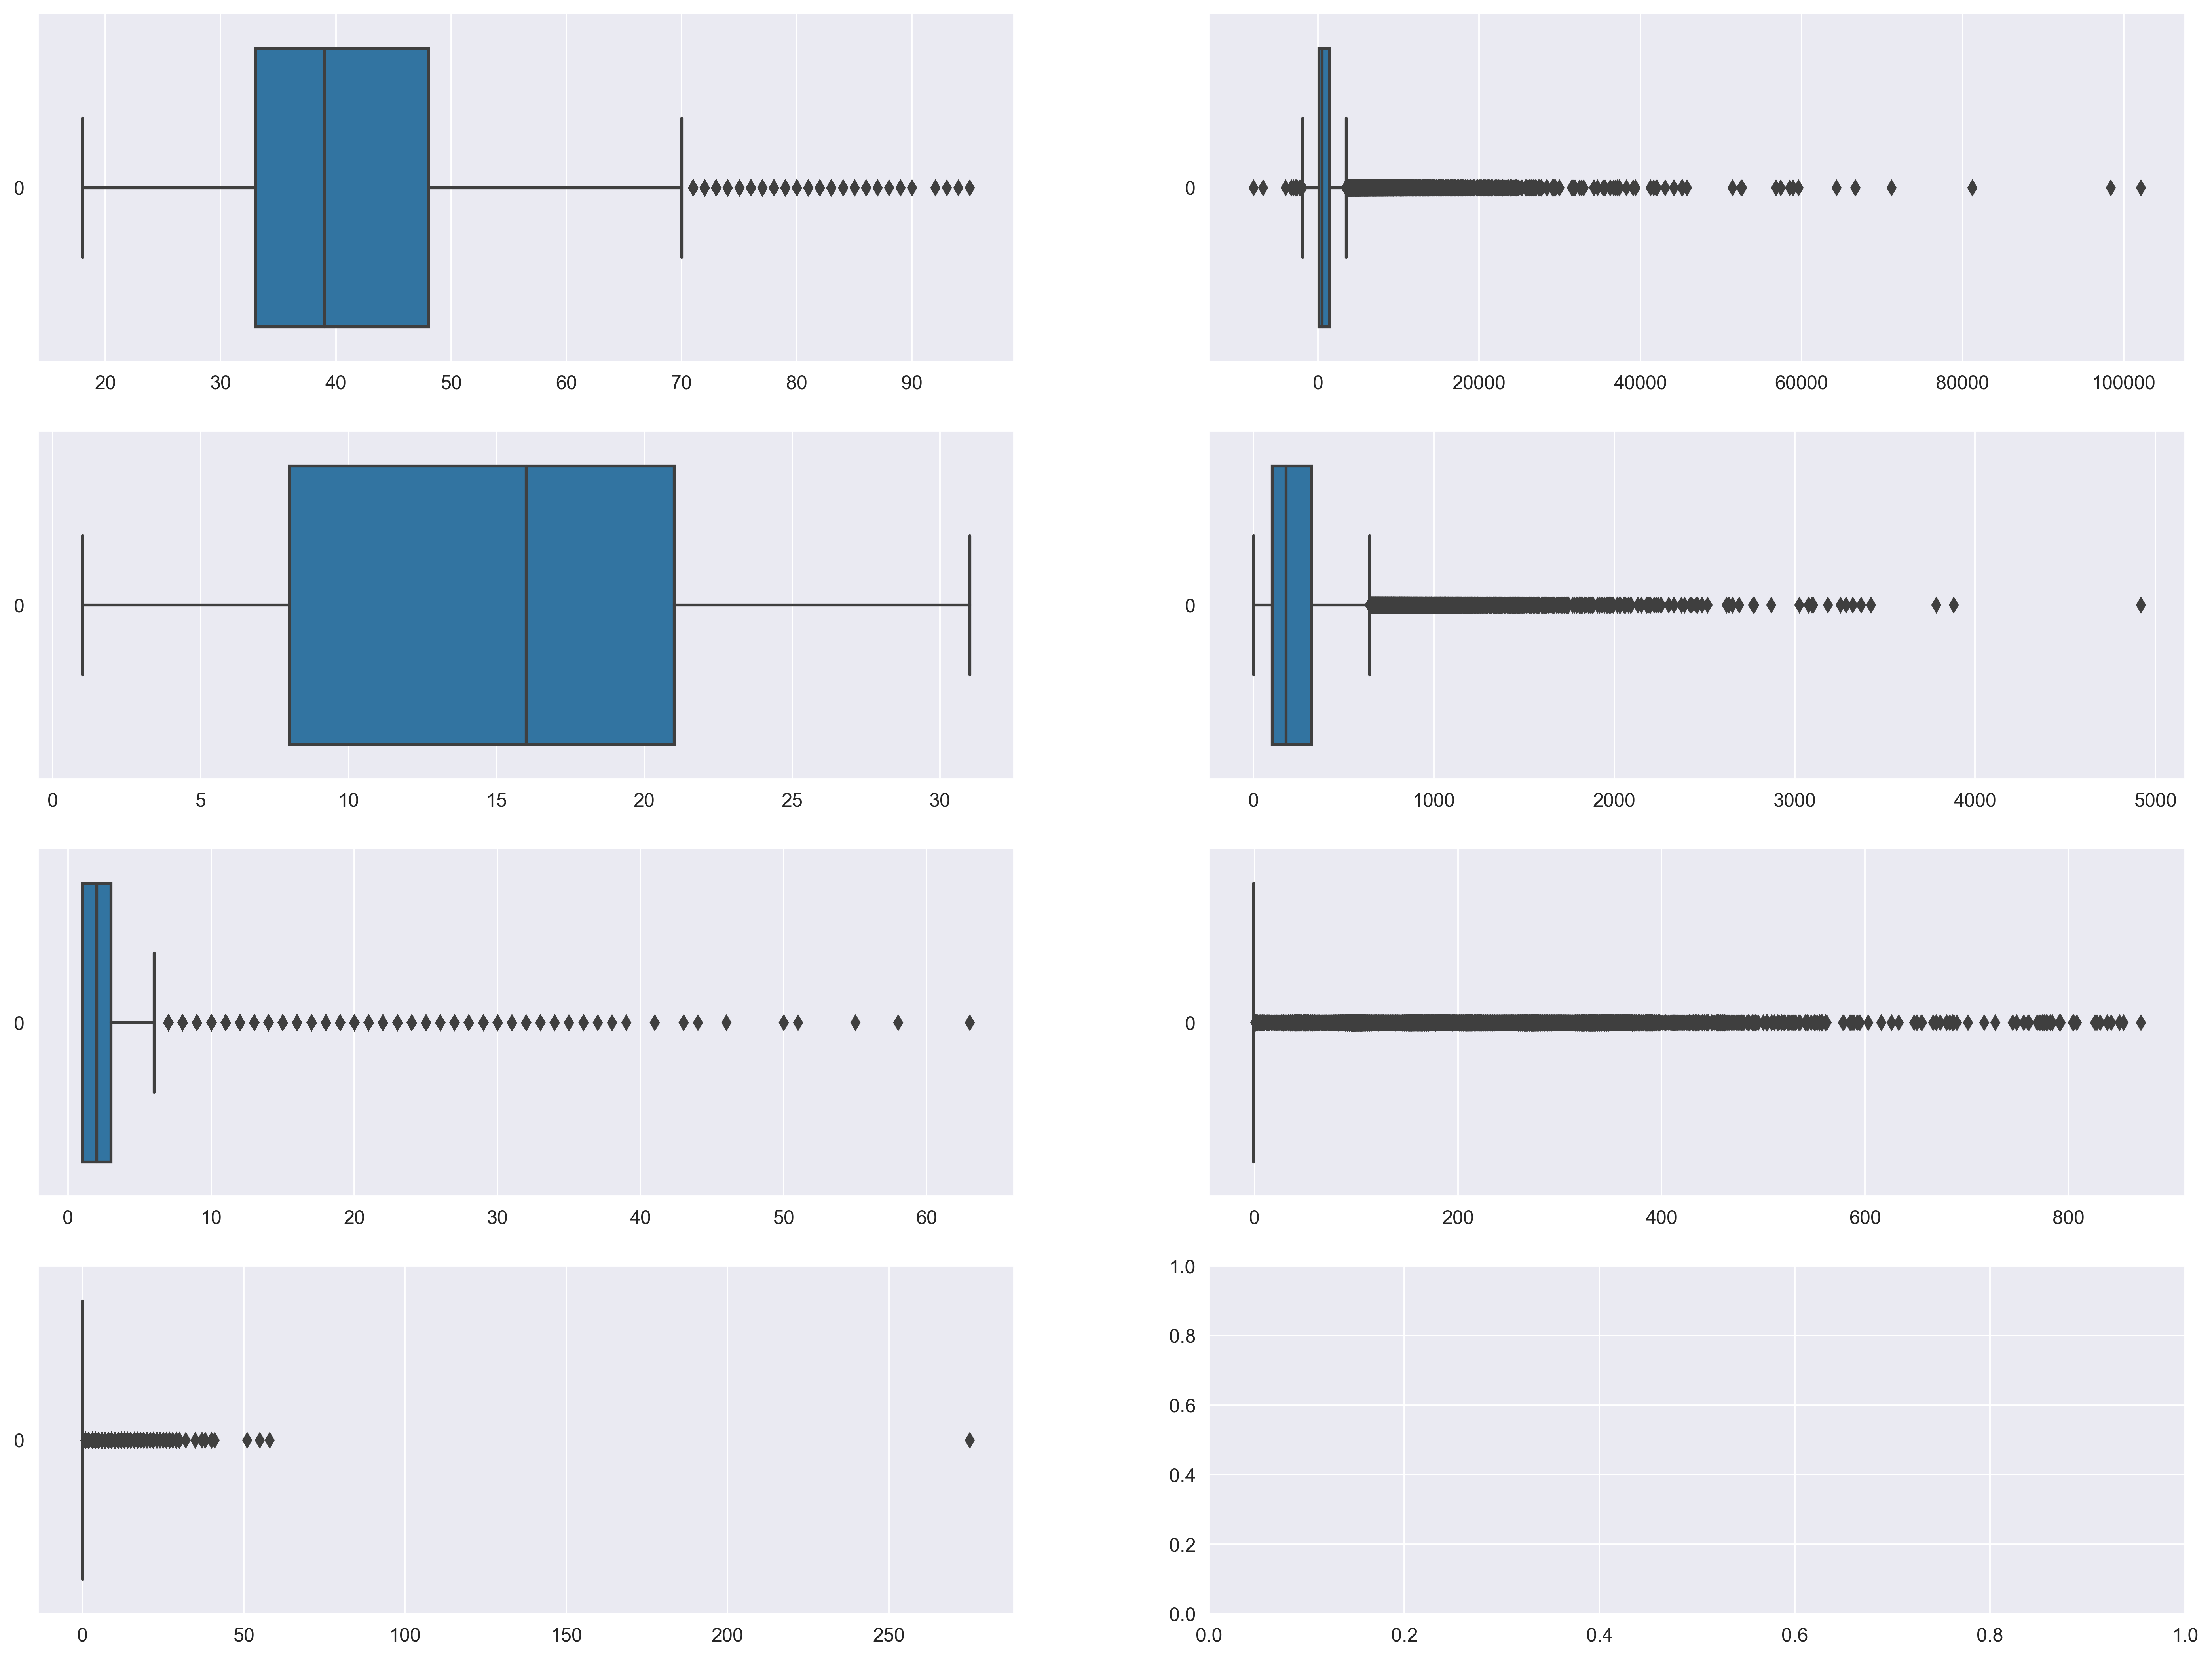

In [13]:
fig,ax = plt.subplots(4,2)

sns.boxplot(data['age'],ax=ax[0,0],orient='h')
sns.boxplot(data['balance'],ax=ax[0,1],orient='h')
sns.boxplot(data['day'],ax=ax[1,0],orient='h')
sns.boxplot(data['duration'],ax=ax[1,1],orient='h')
sns.boxplot(data['campaign'],ax=ax[2,0],orient='h')
sns.boxplot(data['pdays'],ax=ax[2,1],orient='h')
sns.boxplot(data['previous'],ax=ax[3,0],orient='h')

From above boxplot's we can see that their is huge amount of outliers are present in every column except age column so we remove outliers from age column and retaining outliers in others column as it is.

In [14]:
print("OLD DATASHAPE :- ",data.shape)

OLD DATASHAPE :-  (45211, 17)


In [15]:
''' Detection '''
# IQR
# Calculate the upper and lower limits
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR,
print("Lower Fence value is", lower)
print("Upper Fence value is", upper)

Lower Fence value is 10.5
Upper Fence value is (70.5,)


In [16]:
upper_array = np.where(data['age'] >= upper)[0]
lower_array = np.where(data['age'] <= lower)[0]

In [17]:
data.drop(index=upper_array, inplace=True)
data.drop(index=lower_array, inplace=True)

<Axes: >

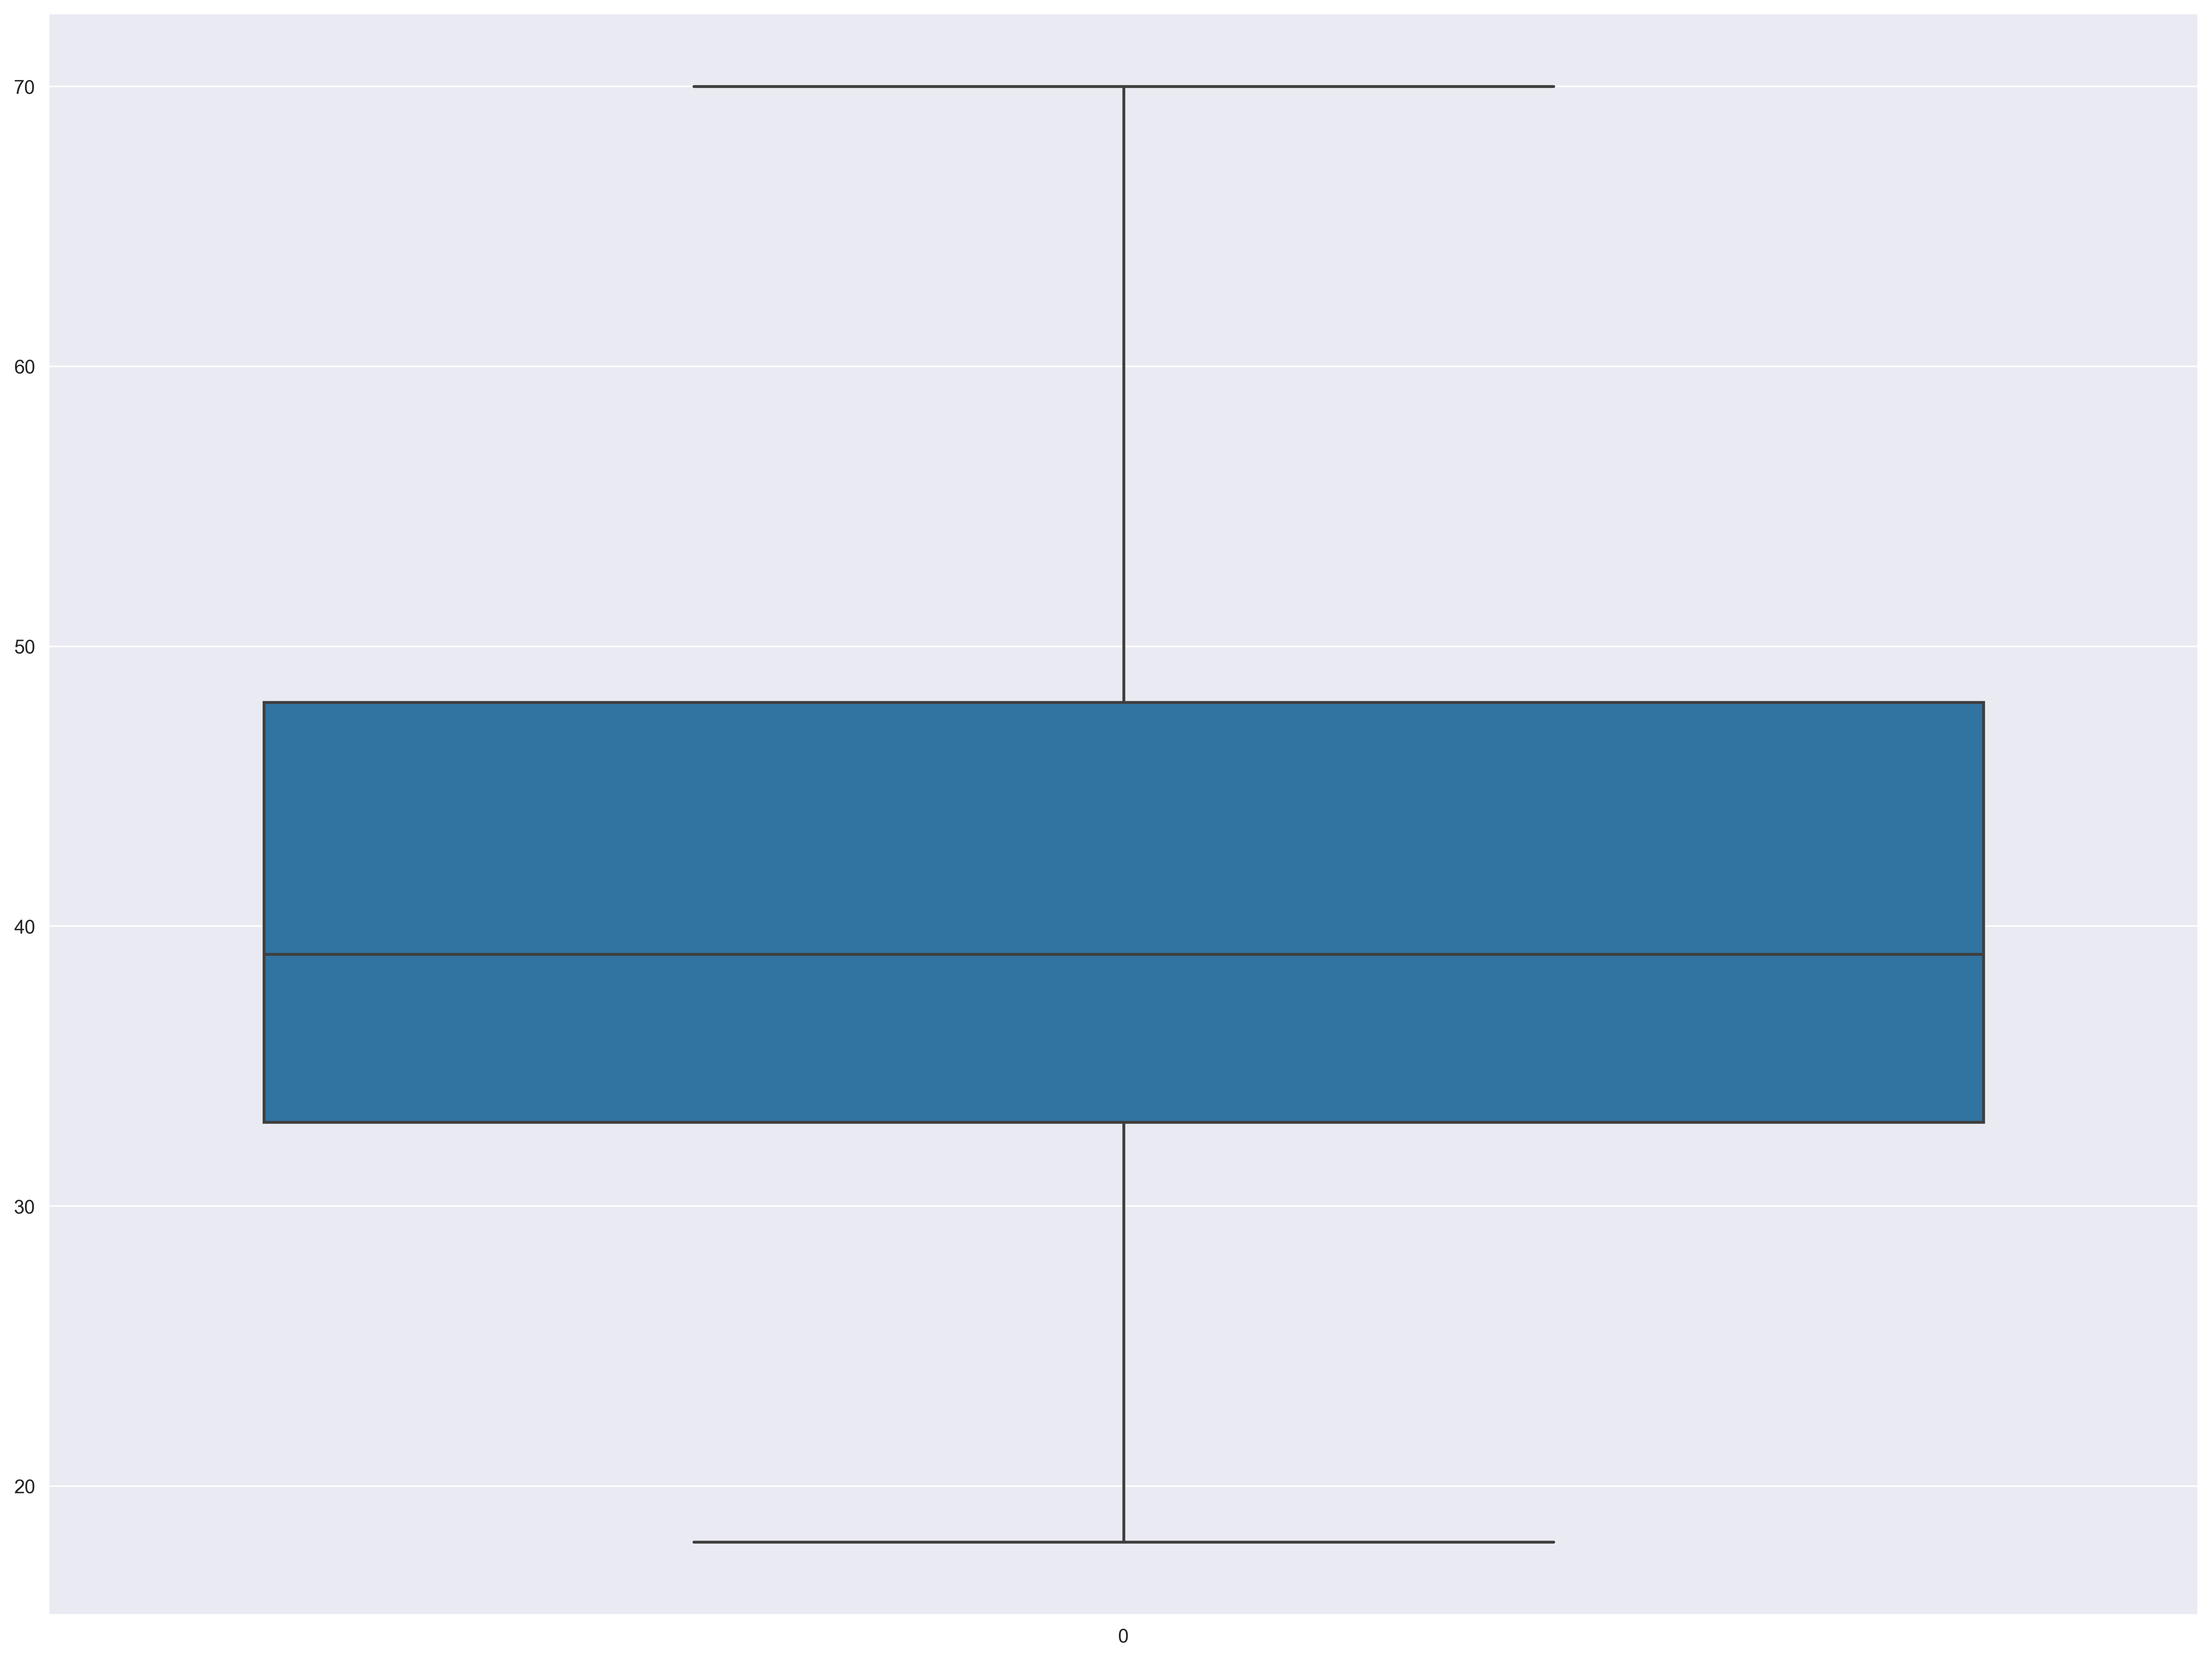

In [18]:
sns.boxplot(data['age'])

In [19]:
print('NEW DATASHAPE :-',data.shape)

NEW DATASHAPE :- (44724, 17)


In [20]:
## there is no need to contact column and duration column it will not contribute to model building.
data.drop(columns=['contact','duration'],inplace=True)

In [21]:
data['default'] = np.where(data['default']=='yes',1,0)
data['housing'] = np.where(data['housing']=='yes',1,0)
data['loan']    = np.where(data['loan'] == 'yes',1,0)
data['y']       = np.where(data['y'] == 'yes',1,0)

In [22]:
# One-Hot Encoding of categrical variables
new_data =pd.get_dummies(data,columns=['job','marital','education','poutcome','month'],dtype=int)
new_data

,age,default,balance,housing,loan,day,campaign,pdays,previous,y,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,58,0,2143,1,0,5,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
1,44,0,29,1,0,5,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
2,33,0,2,1,1,5,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,47,0,1506,1,0,5,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,33,0,1,0,0,5,1,-1,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45203,23,0,113,0,0,17,1,-1,0,1,...,0,0,0,0,0,0,0,1,0,0
45205,25,0,505,0,1,17,2,-1,0,1,...,0,0,0,0,0,0,0,1,0,0
45206,51,0,825,0,0,17,3,-1,0,1,...,0,0,0,0,0,0,0,1,0,0
45209,57,0,668,0,0,17,4,-1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [23]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44724 entries, 0 to 45210
Data columns (total 45 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  44724 non-null  int64
 1   default              44724 non-null  int32
 2   balance              44724 non-null  int64
 3   housing              44724 non-null  int32
 4   loan                 44724 non-null  int32
 5   day                  44724 non-null  int64
 6   campaign             44724 non-null  int64
 7   pdays                44724 non-null  int64
 8   previous             44724 non-null  int64
 9   y                    44724 non-null  int32
 10  job_admin.           44724 non-null  int32
 11  job_blue-collar      44724 non-null  int32
 12  job_entrepreneur     44724 non-null  int32
 13  job_housemaid        44724 non-null  int32
 14  job_management       44724 non-null  int32
 15  job_retired          44724 non-null  int32
 16  job_self-employed    44724 

In [24]:
new_data.shape

(44724, 45)

### Model Building

In [25]:
# Dividing our data into input and output variables
x=pd.concat([new_data.iloc[:,0:9],new_data.iloc[:,10:]],axis=1)
y=new_data['y']

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.25,random_state=0)

In [28]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()
lg.fit(xtrain,ytrain)   # For training data
ypred = lg.predict(xtest) ### For testing data

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [29]:
ypred

array([0, 0, 0, ..., 0, 0, 0])

In [30]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [31]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94      9936
           1       0.79      0.03      0.06      1245

    accuracy                           0.89     11181
   macro avg       0.84      0.51      0.50     11181
weighted avg       0.88      0.89      0.84     11181



#### Threshold Selection

In [32]:
print(ytest[:25].values)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]


In [33]:
print(ypred[:25])

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [34]:
lg.predict_proba(xtest)

array([[0.9767629 , 0.0232371 ],
       [0.88179759, 0.11820241],
       [0.87427673, 0.12572327],
       ...,
       [0.95241115, 0.04758885],
       [0.9355528 , 0.0644472 ],
       [0.94512165, 0.05487835]])

In [35]:
proba = lg.predict_proba(xtest)[:,1]

In [36]:
proba

array([0.0232371 , 0.11820241, 0.12572327, ..., 0.04758885, 0.0644472 ,
       0.05487835])

In [37]:
from sklearn.metrics import roc_auc_score,roc_curve

In [38]:
auc = roc_auc_score(ytest,proba)

In [39]:
auc

0.7267458723784024

In [40]:
fpr,tpr,thresh = roc_curve(ytest,proba)

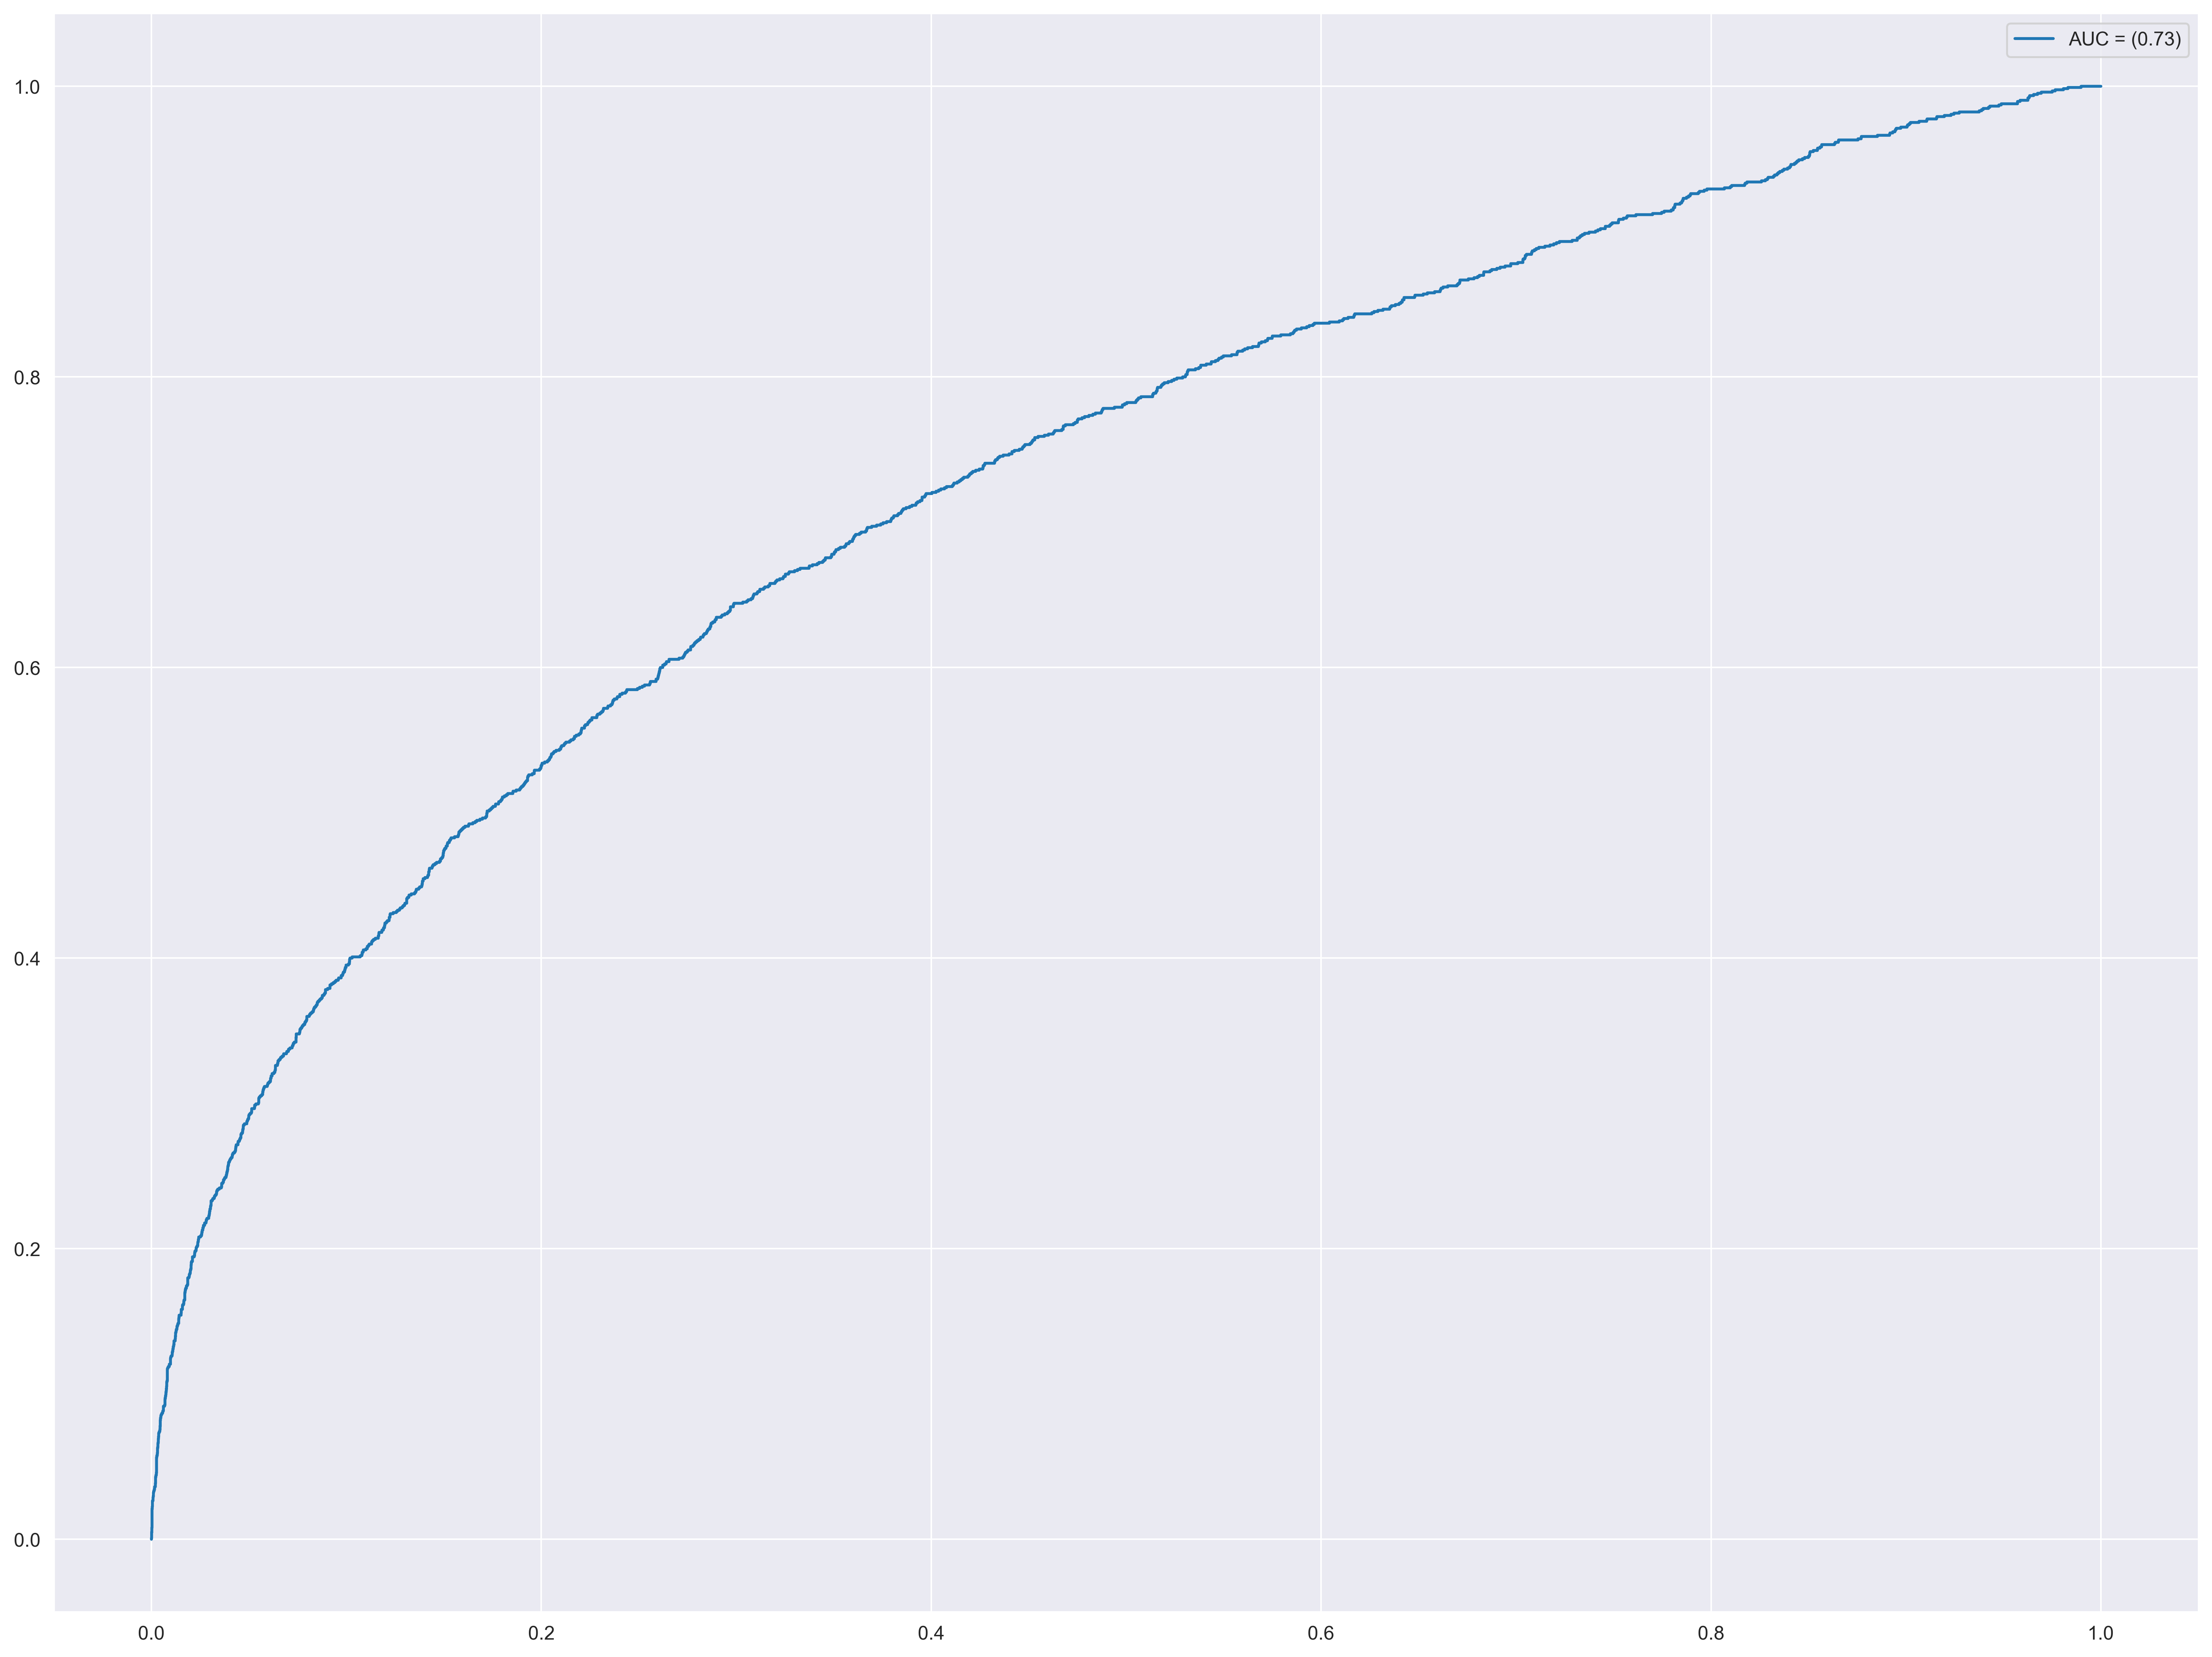

In [41]:
plt.plot(fpr,tpr,label = 'AUC = (%0.2f)'%auc)
plt.legend()

In [42]:
accuracy = []
for i in thresh:
    ypred = np.where(proba>i,1,0)
    accuracy.append(accuracy_score(ytest,ypred))

In [43]:
threshold_sel = pd.DataFrame({
    'Threshold' : thresh,
    'Accuracy'  : accuracy
})

In [44]:
threshold_sel

,Threshold,Accuracy
0,inf,0.888650
1,0.777042,0.888650
2,0.775005,0.888740
3,0.605915,0.889008
4,0.583482,0.889098
...,...,...
1954,0.012894,0.126286
1955,0.012790,0.126196
1956,0.008791,0.120383
1957,0.008657,0.120293


In [45]:
threshold_sel.sort_values(by='Accuracy', ascending=False)

,Threshold,Accuracy
108,0.347864,0.894374
107,0.349003,0.894374
109,0.346948,0.894285
110,0.346257,0.894196
111,0.346227,0.894106
...,...,...
1954,0.012894,0.126286
1955,0.012790,0.126196
1956,0.008791,0.120383
1957,0.008657,0.120293


In [46]:
from sklearn.preprocessing import binarize

In [47]:
ypred = binarize([proba],threshold=0.347864)[0]

In [48]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94      9936
           1       0.64      0.12      0.20      1245

    accuracy                           0.89     11181
   macro avg       0.77      0.55      0.57     11181
weighted avg       0.87      0.89      0.86     11181



In [49]:
confusion_matrix(ytest,ypred)

array([[9853,   83],
       [1099,  146]], dtype=int64)

The accracy of model is 89% after selecting threshold values. 

##### Hyperparameter Tuning

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [52]:
from sklearn.linear_model import LogisticRegression
classifire = LogisticRegression()

In [53]:
from sklearn.model_selection import GridSearchCV
parameter ={'penalty' : ['l1','l2','elasticnet'], 
            'C' : [1,2,3,4,5,6,7,20,40],'max_iter' : [100,200,300]}

In [54]:
logistic_model = GridSearchCV(classifire,param_grid=parameter,scoring='accuracy',cv=5)

In [55]:
logistic_model.fit(x_train,y_train)

C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 20, 40],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [57]:
print(logistic_model.best_params_)

{'C': 6, 'max_iter': 300, 'penalty': 'l2'}


In [58]:
print(logistic_model.best_score_)

0.8941358598303278


In [59]:
## prediction
y_pred = logistic_model.predict(x_test)

In [60]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [61]:
score = accuracy_score(y_pred,y_test)
score

0.8992040067972453

In [62]:
confusion_matrix(y_test,y_pred)

array([[9870,   66],
       [1061,  184]], dtype=int64)

In [63]:
###by using hyperparameter tuning
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.99      0.90      0.95     10931
           1       0.15      0.74      0.25       250

    accuracy                           0.90     11181
   macro avg       0.57      0.82      0.60     11181
weighted avg       0.97      0.90      0.93     11181



After Hyperparameter tunning accuracy is increased by 1% but our recall value also increased which 
is very less. Model accuracy is 90%